In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from netCDF4 import Dataset,date2num, num2date
import os
import netCDF4
import xarray as xr
import cartopy.crs as ccrs
import scipy

%matplotlib inline

In [11]:
from utils_local import bounding_ranks, get_gridpoint_trends, plot_trends

In [3]:
HOME = "/scistor/ivm/the410"

In [4]:
os.chdir(HOME)

###  Loading of rank anoms - to then split them by "low"-"bulk"-"high"

NOTE - this was done on hpc, here just an example on how this would work 

In [5]:
var = 'STREAM250'

preprocessing = "all" #'seasonality_only' # None, all 

startyear = 1940 

which_var = f'STREAM250_midlat_remove_{preprocessing}_{startyear}_onward'

basedir = '/scistor/ivm/the410/WAVE5/rankday_anomalies/'

ranks = xr.open_dataarray(f'{basedir}{which_var}_rank_within_season.nc')

rank_anoms = xr.open_dataarray(f'{basedir}{which_var}_rank_day_anomalies.nc')

In [ ]:
lats = ranks.latitude
lons = ranks.longitude

In [ ]:
outs_test = bounding_ranks(ranks, rank_anoms, bounds=[23, 70])

In [ ]:
#to plot a few grid points
outs_test[0].mean("rank_anom")[0,0,:].plot(label="lows")
outs_test[1].mean("rank_anom")[0,0,:].plot(label="middle")
outs_test[2].mean("rank_anom")[0,0,:].plot(label="highs")
plt.legend()
plt.show()
outs_test[0].mean("rank_anom")[0,1,:].plot(label="lows")
outs_test[1].mean("rank_anom")[0,1,:].plot(label="middle")
outs_test[2].mean("rank_anom")[0,1,:].plot(label="highs")
plt.legend()

In [ ]:
#if you want to save the output
outpath = "/scistor/ivm/the410/WAVE5/rankday_anomalies/rank_anomalies_split"

for out in outs_test:
    binbounds = str(out.attrs['bin bounds'])
    out.to_netcdf(f'{outpath}/{which_var}_rank_split_{binbounds}_test.nc')

# to load in the saved rank anomalies data, split per catagory

In [6]:
var = 'STREAM250'
preprocessing = "all" 
startyear = 1940 

which_var = f'STREAM250_midlat_remove_{preprocessing}_{startyear}_onward'

In [7]:
#We want to only calculate the trends from 1979 onwards
start_year_cut = 1979

path= "/scistor/ivm/the410/WAVE5/rankday_anomalies/rank_anomalies_split/"
files = [f"{which_var}_rank_split_1-24.nc", 
         f"{which_var}_rank_split_24-70.nc",
         f"{which_var}_rank_split_70-93.nc"]

outs = []
for file in files:
    data = xr.open_dataarray(f'{path}{file}')
#     print(data)
    data_cut = data.sel(time=data.time>=start_year_cut)
    outs.append(data_cut)

### Now calculate the gridpoint trend for each of the splitted ranks 

In [8]:
trends_total, pvals_total = get_gridpoint_trends(outs)

## Now plot the trends per bin

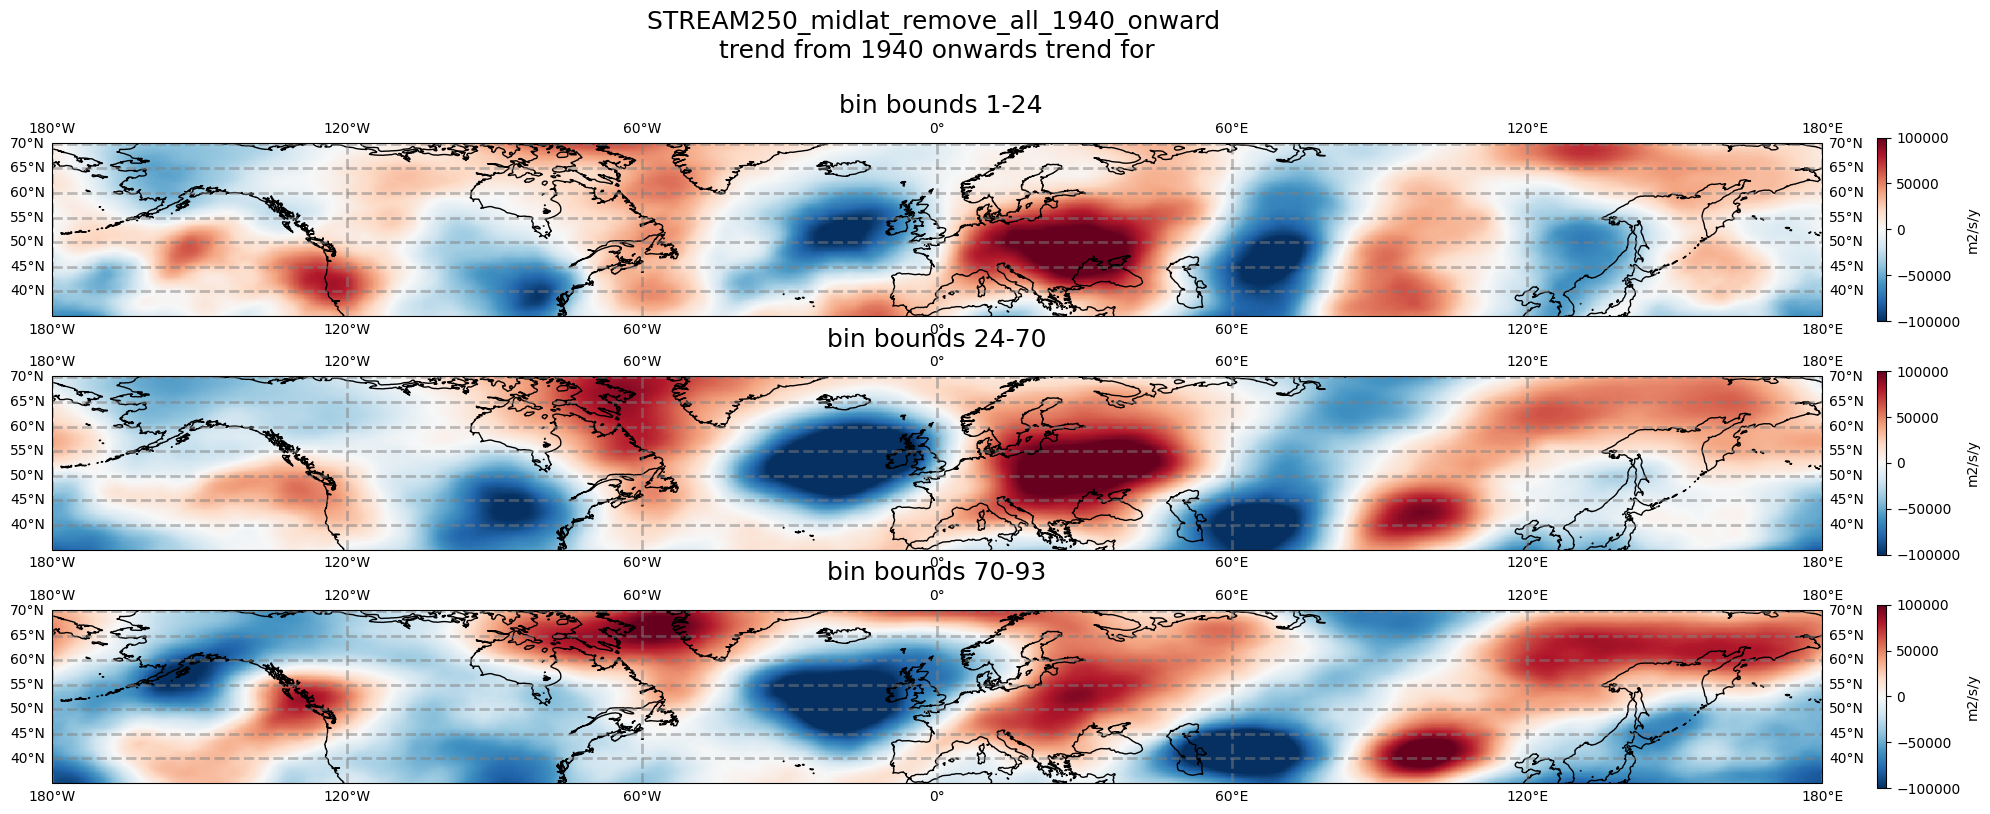

In [39]:
plot_trends(outs, trends_total, pvals_total, outs[0].longitude, outs[0].latitude, 
            vmin=-100000, vmax=100000, 
            var=which_var, 
            var_title=f"{which_var} \n trend from {startyear} onwards",
           save_fig=False)